In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [13]:
df = pd.read_csv('../3-feature-engieering/gurgaon_properties_missing_value_imputation.csv')

In [6]:
df.shape

(3544, 19)

In [7]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97
1,1,flat,raheja vedaanta,sector 108,0.85,4637.0,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65
2,2,flat,511 sarahah tower,sector 12,0.60,8333.0,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0
3,3,flat,laxmi pareena,sector 99a,0.30,6667.0,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0
4,4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152


In [8]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [9]:
train_df.head()

,Unnamed: 0,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,sector 77,1.50,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97
1,1,flat,sector 108,0.85,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65
2,2,flat,sector 12,0.60,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0
3,3,flat,sector 99a,0.30,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0
4,4,flat,sector 102,1.55,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152


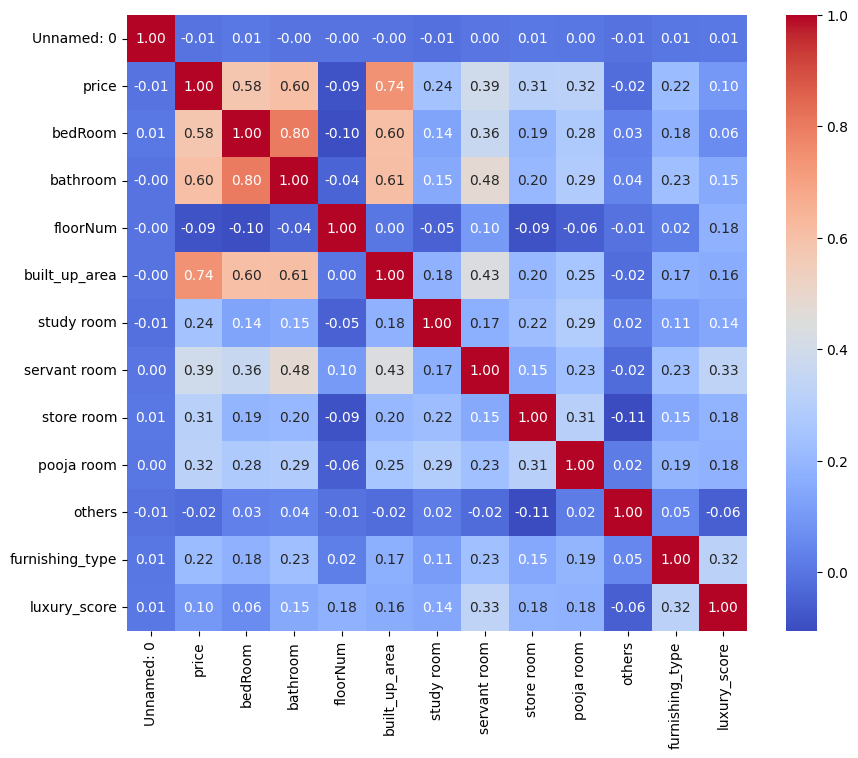

In [10]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [18]:

correlation_with_price = train_df.select_dtypes(include=[np.number]).corr()['price'].sort_values(ascending=False)


In [ ]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession

In [19]:
correlation_with_price

price              1.000000
built_up_area      0.744957
bathroom           0.604561
bedRoom            0.578395
servant room       0.392165
pooja room         0.318886
store room         0.309637
study room         0.241894
furnishing_type    0.216249
luxury_score       0.097440
Unnamed: 0        -0.005162
others            -0.021639
floorNum          -0.087095
Name: price, dtype: float64